# Neural Network

## Linear Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Generate Data

In [3]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1)

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


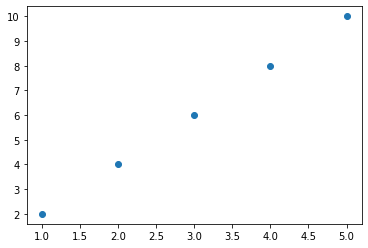

In [4]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

### Derive Normal Equation

In [5]:
xtx = torch.mm(x.t(),x)
xtx_inv = xtx.inverse()
xtx_inv_xt = torch.mm(xtx_inv, x.t())

In [6]:
w = torch.mm(xtx_inv_xt, y)
w.item()

1.9999998807907104

### Define Model with Grad, nn.loss

In [7]:
w = torch.rand(1,1)
w.item()

0.9970294833183289

In [8]:
w*x

tensor([[0.9970],
        [1.9941],
        [2.9911],
        [3.9881],
        [4.9851]])

### Training

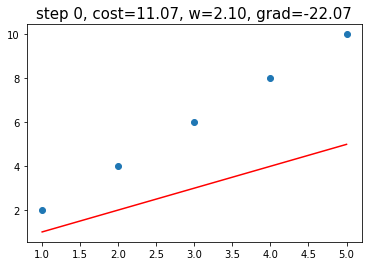

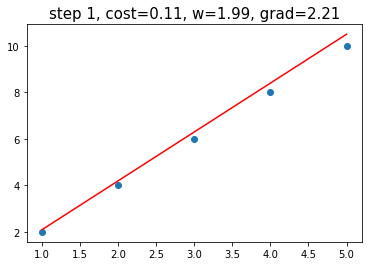

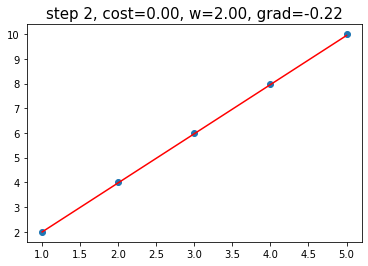

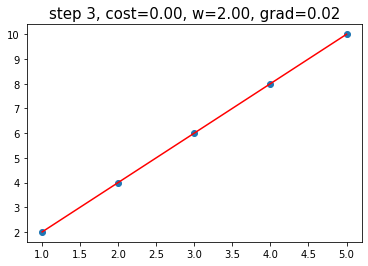

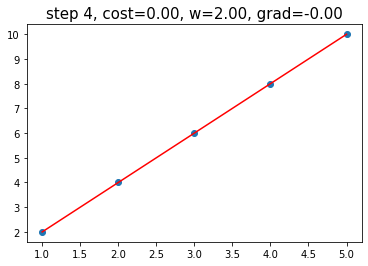

In [9]:
lr = 0.05

for step in range(5):
    pre = w*x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), pre.numpy(), 'r-')
    # w.size() = 1*1, grad.size() = 1
    plt.title('step %d, cost=%.2f, w=%.2f, grad=%4.2f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
    plt.show()


In [10]:
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

12.000060081481934

### Define Model with nn.Linear, Optimizer

In [11]:
model = nn.Linear(1, 1, bias = False)
model.weight

Parameter containing:
tensor([[-0.6492]], requires_grad=True)

In [12]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

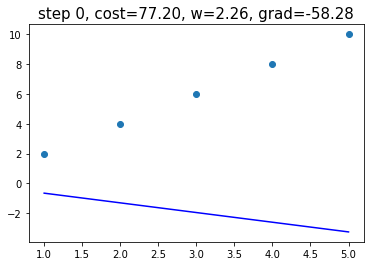

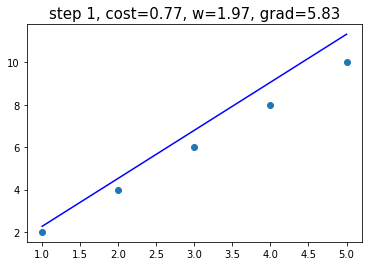

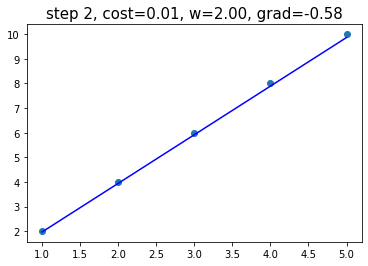

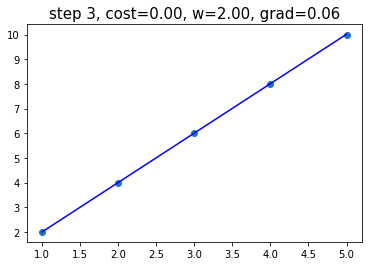

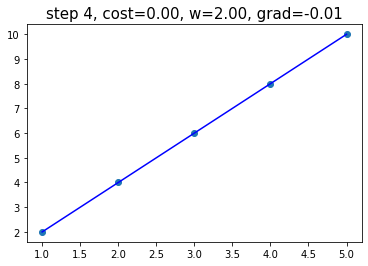

In [13]:
for step in range(5):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    plt.scatter(x.numpy(), y.numpy())
    # grad를 가진 tensor는 numpy()를 바로 사용할 수 없음
    # RuntimeError: Can't call numpy() on Variable that requires grad.
    plt.plot(x.numpy(), pre.detach().numpy(), 'b-')
    plt.title('step %d, cost=%.2f, w=%.2f, grad=%4.2f' 
              % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
    plt.show()

In [14]:
x_new = torch.Tensor([6])
y_new = model(x_new)
y_new.item()

12.000158309936523

### Problem #1

In [15]:
X = torch.rand(100, 20)
Y = torch.rand(100, 1)

In [16]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-16-e5c7caef4e31>, line 1)

### Problem #2

In [17]:
X = torch.rand(500, 30)
Y = torch.rand(500, 2)

In [18]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-18-e5c7caef4e31>, line 1)

### Problem #3

In [19]:
X = torch.rand(500, 40)
Y = torch.rand(1000, 1)

In [20]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-20-e5c7caef4e31>, line 1)

### Problem #4

In [21]:
X = torch.rand(1000, 200, 20)
Y = torch.rand(1000, 2)

In [22]:
model = nn.Linear(?, ?)
model(X.view(?)).shape == Y.shape

SyntaxError: invalid syntax (<ipython-input-22-e5c7caef4e31>, line 1)

## Activation Functions

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

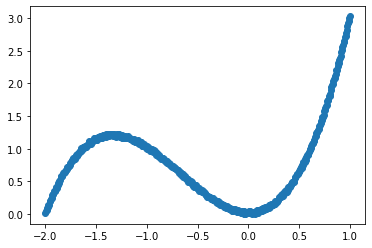

In [25]:
x = torch.linspace(-2, 1, 500)
y = x.pow(3) + 2*x.pow(2) + 0.05*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [26]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [27]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

In [28]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

### Define & Train Linear Model

In [29]:
hidden = nn.Linear(1, 10, bias=True)
output = nn.Linear(10, 1, bias=True)

In [30]:
model = nn.Sequential(hidden, output)

In [31]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

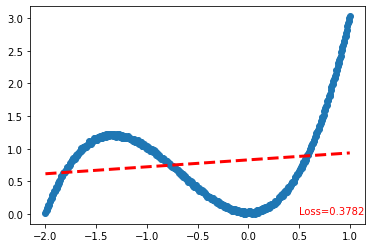

In [32]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=3)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

### Define & Train NonLinear Model

In [33]:
hidden = nn.Linear(1, 10, bias=True)
activation = nn.ReLU()
output = nn.Linear(10, 1, bias=True)

In [34]:
model = nn.Sequential(hidden, activation, output)

In [35]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

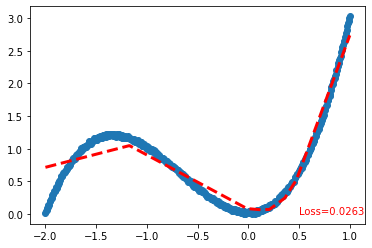

In [36]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=3)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()